In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from sklearn.decomposition import PCA

In [3]:
df_combined = pd.read_csv(r'/home/sanven0212/PycharmProjects/MultiOmicsFYP/Combined_Omics_Mutated_Genes_Dataset.csv')
df_combined

,Unnamed: 0,GE_SPOP,GE_NKX3-1,GE_ZMYM3,GE_BRAF,GE_ATM,GE_CTNNB1,GE_FOXA1,CNA_SPOP,CNA_TP53,...,MutSig_(Q-value)_TP53,MutSig_(Q-value)_SPOP,MutSig_(Q-value)_FOXA1,Mut_TP53,Mut_SPOP,Mut_FOXA1,Freq_TP53,Freq_SPOP,Freq_FOXA1,Gleason_Score
0,0,0.432423,0.576310,0.710846,0.401258,0.487204,0.822607,0.684537,0.386164,0.954066,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
1,1,0.651981,0.697055,0.645458,0.370666,0.426688,0.781097,0.593167,0.403145,0.974398,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
2,2,0.258006,0.582047,0.787792,0.405120,0.603989,0.757727,0.687300,0.398113,0.968373,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
3,3,0.509185,0.622602,0.598594,0.169027,0.175336,0.705212,0.379166,0.381761,0.948795,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
4,4,0.409782,0.722197,0.757623,0.290225,0.531428,0.745461,0.555879,0.396226,0.960090,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,285,0.460518,0.610432,0.415766,0.173626,0.247439,0.654671,0.367789,0.399371,0.970633,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
286,286,0.210884,0.568091,0.633152,0.222890,0.317335,0.450947,0.720822,0.437134,0.970529,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
287,287,0.254737,0.609776,0.569000,0.261703,0.473819,0.433723,0.547904,0.405660,0.977410,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
288,288,0.694129,0.600637,0.332852,0.198713,0.235125,0.688736,0.402767,0.653459,0.597139,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0


In [4]:
df_combined.drop('Unnamed: 0', axis = 1, inplace = True)
df_combined

,GE_SPOP,GE_NKX3-1,GE_ZMYM3,GE_BRAF,GE_ATM,GE_CTNNB1,GE_FOXA1,CNA_SPOP,CNA_TP53,CNA_MED12,...,MutSig_(Q-value)_TP53,MutSig_(Q-value)_SPOP,MutSig_(Q-value)_FOXA1,Mut_TP53,Mut_SPOP,Mut_FOXA1,Freq_TP53,Freq_SPOP,Freq_FOXA1,Gleason_Score
0,0.432423,0.576310,0.710846,0.401258,0.487204,0.822607,0.684537,0.386164,0.954066,0.705706,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
1,0.651981,0.697055,0.645458,0.370666,0.426688,0.781097,0.593167,0.403145,0.974398,0.776777,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
2,0.258006,0.582047,0.787792,0.405120,0.603989,0.757727,0.687300,0.398113,0.968373,0.707708,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
3,0.509185,0.622602,0.598594,0.169027,0.175336,0.705212,0.379166,0.381761,0.948795,0.706707,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
4,0.409782,0.722197,0.757623,0.290225,0.531428,0.745461,0.555879,0.396226,0.960090,0.760761,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.460518,0.610432,0.415766,0.173626,0.247439,0.654671,0.367789,0.399371,0.970633,0.774775,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
286,0.210884,0.568091,0.633152,0.222890,0.317335,0.450947,0.720822,0.437134,0.970529,0.777148,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
287,0.254737,0.609776,0.569000,0.261703,0.473819,0.433723,0.547904,0.405660,0.977410,0.765766,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
288,0.694129,0.600637,0.332852,0.198713,0.235125,0.688736,0.402767,0.653459,0.597139,0.774775,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0


# **PCA**

In [5]:
pca = PCA(n_components = None)
pca.fit(df_combined.drop('Gleason_Score', axis = 1))
evr = pca.explained_variance_ratio_
cevr = np.cumsum(evr)

In [6]:
evr

array([2.18245577e-01, 2.13557127e-01, 1.15933802e-01, 6.36192116e-02,
       5.64328583e-02, 4.69043652e-02, 4.15957996e-02, 3.74552038e-02,
       3.26990021e-02, 2.55791596e-02, 2.40052187e-02, 2.23291470e-02,
       1.72102906e-02, 1.46393956e-02, 1.38446281e-02, 1.22036022e-02,
       1.03313543e-02, 9.83835647e-03, 8.50242129e-03, 7.43333427e-03,
       5.70935159e-03, 1.93079323e-03, 1.58600489e-33, 1.58600489e-33,
       1.58600489e-33, 1.58600489e-33, 1.58600489e-33, 1.58600489e-33,
       1.58600489e-33, 1.58600489e-33, 1.58600489e-33])

In [7]:
len(evr)

31

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

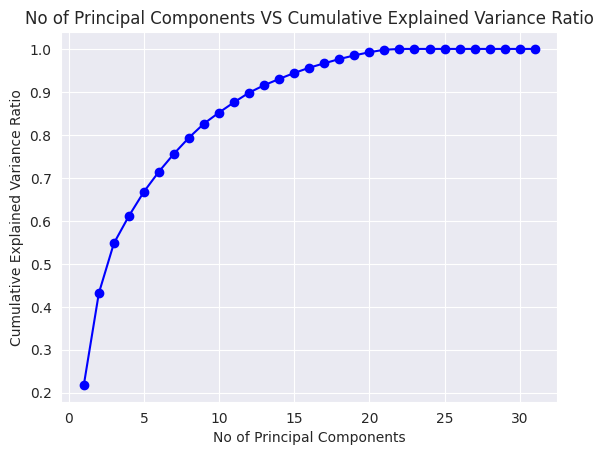

In [10]:
plt.plot(range(1, len(cevr) + 1), cevr, color = 'b', marker = 'o')
plt.title('No of Principal Components VS Cumulative Explained Variance Ratio')
plt.xlabel('No of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')

**Note: From the above code it is evident that around half of the features can be removed since just retaining around 12 features preserves almost 90% of the variance.**

In [12]:
#Determining the exact no of features that capture 90% of the variance
X = df_combined.drop('Gleason_Score', axis = 1)
pca_1 = PCA(n_components = 0.9).fit(X)
print(f'No of components that capture 90% of the variance: {pca_1.n_components_}')

No of components that capture 90% of the variance: 13


Text(0, 0.5, 'Explained Variance')

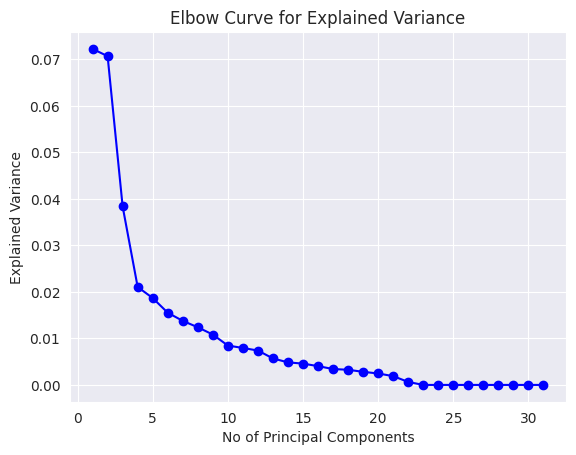

In [13]:
#Checking the elbow curve for the pca explained variance for entire dataset
ev = pca.explained_variance_
plt.plot(range(1, len(ev) + 1), ev, marker = 'o', color = 'b')
plt.title('Elbow Curve for Explained Variance')
plt.xlabel('No of Principal Components')
plt.ylabel('Explained Variance')

**The elbow point for the curve is around the 5 principal component mark. However since, we want to preserve atleast 90% of the variance of the dataset. We will be going with 13 principal components**